# Labels
- Throw away some of the atoms
        - For example H atoms in RCOMe
    
- Treat some atoms as R
        - For example the two C atoms in ArCI
        
First, plot the first fragments and their labels.      


In [20]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys

sys.path.append('../scripts/')

from classes.Radii import Radii

In [21]:
central_groups = ["RCOMe", "RNO2", "REt", "ArCI", "NO3", "RC6F5", "H2O", "RC6H5"]
contact_groups = ["ArCH", "C2CH2", "CCH3", "CF", "R2CO", "RC6H5", "RCN", "XH", "XH"]

contact_groups = ["ArCH"]

In [43]:
def plot_fragment_with_labels(central_group, contact_group):
    datafile = "..\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"
    csvfile =  "..\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.csv"

    fp = open(csvfile)
    labels = fp.readline().strip().split(',')
    atoms = fp.readline().strip().split(',')
    fp.close()

    to_delete = []
    for i in range(len(labels)):
        if not "LAB" in labels[i]:
            to_delete.append(i)

    for i in reversed(to_delete):
        del labels[i]
        del atoms[i]
        
    print(labels, '\n', atoms)

    fp = open(datafile)
    line = fp.readline()
    line = fp.readline()

    firstfragment = True
    dictionary = {}

    while firstfragment:                 
        information = line.split()
        x, y, z = float(information[1]), float(information[2]), float(information[3])
        
        if information[0] in atoms:
            dictionary[information[0]] = [x,y,z]

        line = fp.readline()
        
        if "**FRAG**" in line:
            firstfragment = False
    
    xs,ys,zs = [], [], []
    for key, value in dictionary.items():
        xs.append(value[0])
        ys.append(value[1])
        zs.append(value[2])
        
    centroid = [np.mean(xs), np.mean(ys), np.mean(zs)]
    
    for key, value in dictionary.items():
        dictionary[key][0] = dictionary[key][0] - centroid[0]
        dictionary[key][1] = dictionary[key][1] - centroid[1]
        dictionary[key][2] = dictionary[key][2] - centroid[2]
        
    fp.close()

    fig = plt.figure()
    ax: Axes3D = fig.add_subplot(111, projection='3d')

    for i, atom in enumerate(atoms):
        x,y,z = dictionary[atom][0], dictionary[atom][1], dictionary[atom][2]
        
        if 'H' in atom:
            color = 'grey'
            label = 'H'
        elif 'O' in atom:
            color='red'
            label = 'O'
        elif 'F' in atom:
            color='orchid'
            label = 'F'
        elif 'N' in atom:
            color='blue'
            label = 'N'
        else:
            color = 'black'
            label ='C'

        ax.scatter(x,y,z, s=100, edgecolors="black", color=color)
        ax.text(x+0.1, y+0.1, z+0.1, labels[i])
        
    for i, atom in enumerate(atoms):
        x1, y1, z1 = dictionary[atom][0], dictionary[atom][1], dictionary[atom][2]
        for i2, atom2 in enumerate(atoms[i:]):
            x2, y2, z2 = dictionary[atom2][0], dictionary[atom2][1], dictionary[atom2][2]
            distance = ((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)**0.5
            
            radii = Radii('../files/radii.csv')
            
            print(atom, atom2, distance, (radii.get_cov_radius(atom[:1]) + radii.get_cov_radius(atom2[:1])))
            if distance < (radii.get_cov_radius(atom[:1]) + radii.get_cov_radius(atom2[:1]) + 0.01):
                plt.plot([x1, x2], [y1, y2], [z1, z2], color='grey')
        
    # make cubic
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = ax.get_zlim()
    
    print(xlim,ylim,zlim)
    lim_min, lim_max = min(xlim[0],ylim[0],zlim[0]), max(xlim[1],ylim[1],zlim[1])
    
    ax.set_xlim((lim_min, lim_max))
    ax.set_ylim((lim_min, lim_max))
    ax.set_zlim((lim_min, lim_max))
        
    # Hide grid lines
#     ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
#     ax.axis('off')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    plt.title(central_group + "-" + contact_group)
    plt.show()

['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  '] 
 ['O1', 'C2', 'C3', 'N1', 'H2', 'H3', 'H4']


<IPython.core.display.Javascript object>


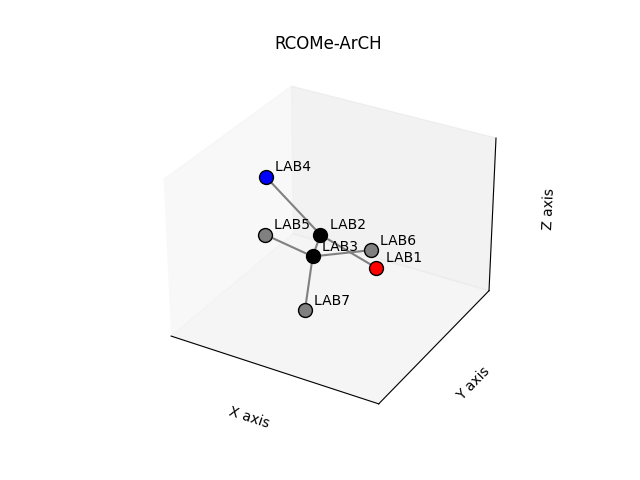

O1 O1 0.0 1.32
O1 C2 1.2380297962892488 1.42
O1 C3 2.3845969868722046 1.42
O1 N1 2.2762676014256322 1.37
O1 H2 3.1851093494101574 0.9750000000000001
O1 H3 2.623398347983013 0.9750000000000001
O1 H4 2.638026844689037 0.9750000000000001
C2 C2 0.0 1.52
C2 C3 1.4918886881734839 1.52
C2 N1 1.3560180295261575 1.47
C2 H2 2.0860758998176454 1.075
C2 H3 2.0202330957837513 1.075
C2 H4 2.0725803709868518 1.075
C3 C3 0.0 1.52
C3 N1 2.4151522369200666 1.47
C3 H2 0.9578470749028782 1.075
C3 H3 0.9935026877668724 1.075
C3 H4 0.9950729668220307 1.075
N1 N1 0.0 1.42
N1 H2 2.5207837649032894 1.025
N1 H3 3.0336575799025183 1.025
N1 H4 3.1329408503513116 1.025
H2 H2 0.0 0.63
H2 H3 1.6543872134721056 0.63
H2 H4 1.56264948545731 0.63
H3 H3 0.0 0.63
H3 H4 1.5266401108643775 0.63
H4 H4 0.0 0.63
(-1.3309582857142859, 1.5949097142857136) (-0.9132215000000004, 1.2089315) (-1.5155027857142858, 1.8764242142857142)
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  '] 
 ['O11', 'N4', 'O12', 'O13']


<IPython.core.display.Javascript object>


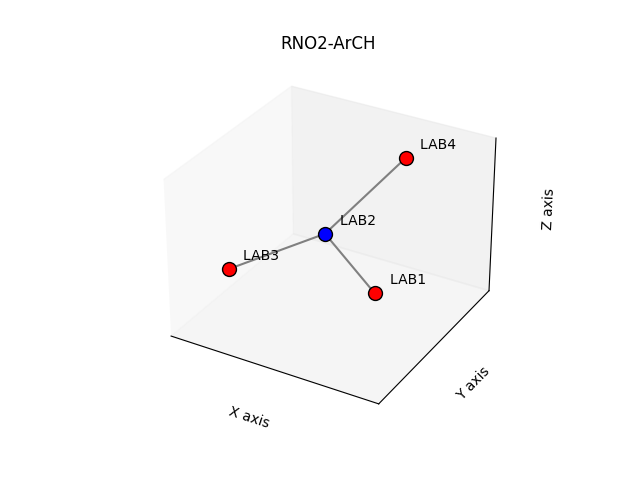

O11 O11 0.0 1.32
O11 N4 1.2554854616442201 1.37
O11 O12 1.9850811366793046 1.32
O11 O13 1.887616890711672 1.32
N4 N4 0.0 1.42
N4 O12 1.0929545280568636 1.37
N4 O13 1.1621756717897684 1.37
O12 O12 0.0 1.32
O12 O13 2.133491150696436 1.32
O13 O13 0.0 1.32
(-1.0525835, 0.9372285000000001) (-0.8185790000000004, 1.0548089999999994) (-0.6906710000000013, 0.6613609999999998)
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  ', 'LAB8  '] 
 ['C103', 'H82', 'H83', 'H84', 'C102', 'H81', 'H80', 'C101']


<IPython.core.display.Javascript object>


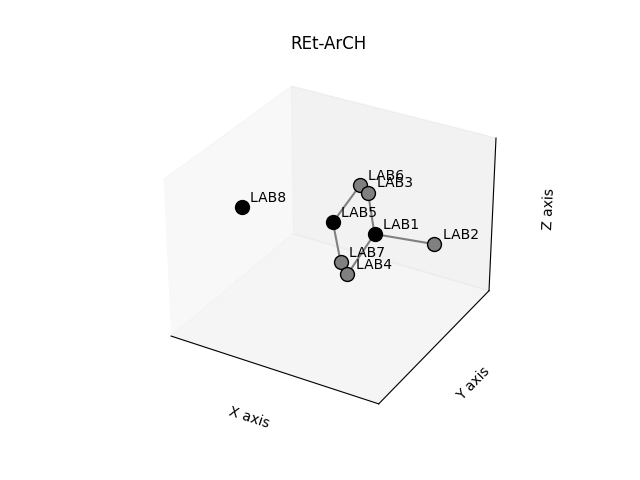

C103 C103 0.0 1.52
C103 H82 0.9792256437614372 1.075
C103 H83 0.971974440919102 1.075
C103 H84 0.9834439718662166 1.075
C103 C102 1.5460061793537565 1.52
C103 H81 2.0889150050205485 1.075
C103 H80 2.0942864863719106 1.075
C103 C101 2.552605082283587 1.52
H82 H82 0.0 0.63
H82 H83 1.6003358300681776 0.63
H82 H84 1.6003331125737543 0.63
H82 C102 2.0852623903480345 1.075
H82 H81 2.375051541882828 0.63
H82 H80 2.3750586216765264 0.63
H82 C101 3.388399900764371 1.075
H83 H83 0.0 0.63
H83 H84 1.600345254437305 0.63
H83 C102 2.08251241662565 1.075
H83 H81 2.3868654627774895 0.63
H83 H80 2.8739258670675567 0.63
H83 C101 2.7390571083677684 1.075
H84 H84 0.0 0.63
H84 C102 2.082142913586865 1.075
H84 H81 2.8739269512289276 0.63
H84 H80 2.3868871595448335 0.63
H84 C101 2.7415761013511917 1.075
C102 C102 0.0 1.52
C102 H81 0.9921044207138681 1.075
C102 H80 0.9913090528185448 1.075
C102 C101 1.5370196310067092 1.52
H81 H81 0.0 0.63
H81 H80 1.6010760637146508 0.63
H81 C101 2.0884609841938633 1.075
H80 

<IPython.core.display.Javascript object>


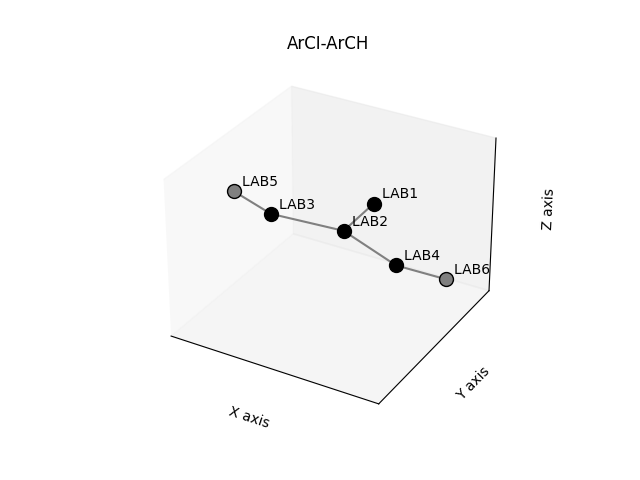

I1 I1 0.0 2.786
I1 C14 2.0928123598163304 2.153
I1 C13 3.0272704212375876 2.153
I1 C15 3.032288958888977 2.153
I1 H9 3.037184429105351 1.708
I1 H10 3.082094612645756 1.708
C14 C14 0.0 1.52
C14 C13 1.3821423696927897 1.52
C14 C15 1.368314550898294 1.52
C14 H9 2.0011893936856655 1.075
C14 H10 2.007820563720772 1.075
C13 C13 0.0 1.52
C13 C15 2.3732654941872813 1.52
C13 H9 0.9289412156320772 1.075
C13 H10 3.218472003979528 1.075
C15 C15 0.0 1.52
C15 H9 3.2042951056043516 1.075
C15 H10 0.9294781083489811 1.075
H9 H9 0.0 0.63
H9 H10 3.9818167362273216 0.63
H10 H10 0.0 0.63
(-2.018894, 1.762664) (-0.894656, 0.7233559999999996) (-1.1893051666666663, 1.7202718333333324)
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  '] 
 ['O12', 'N4', 'O13', 'O11']


<IPython.core.display.Javascript object>


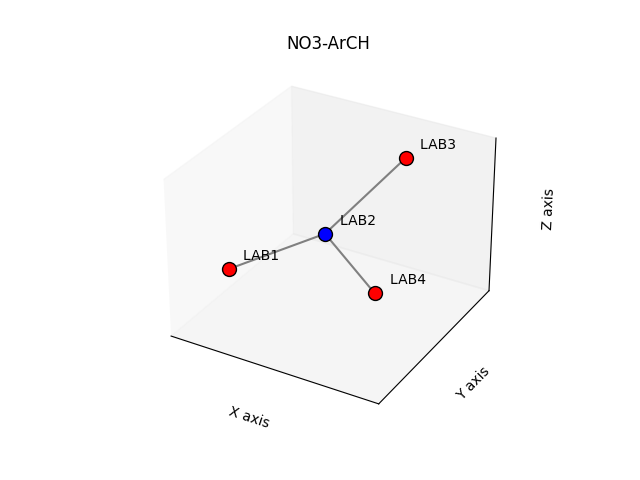

O12 O12 0.0 1.32
O12 N4 1.0929545280568636 1.37
O12 O13 2.133491150696436 1.32
O12 O11 1.9850811366793046 1.32
N4 N4 0.0 1.42
N4 O13 1.1621756717897684 1.37
N4 O11 1.2554854616442201 1.37
O13 O13 0.0 1.32
O13 O11 1.887616890711672 1.32
O11 O11 0.0 1.32
(-1.0525835, 0.9372285000000001) (-0.8185790000000004, 1.0548089999999994) (-0.6906710000000013, 0.6613609999999998)
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  ', 'LAB8  ', 'LAB9  ', 'LAB10 ', 'LAB11 ', 'LAB12 '] 
 ['C1D', 'C2', 'C1E', 'C1', 'C1A', 'C2D', 'F2D', 'F1E', 'F1D', 'F1A', 'F2', 'F1']


<IPython.core.display.Javascript object>


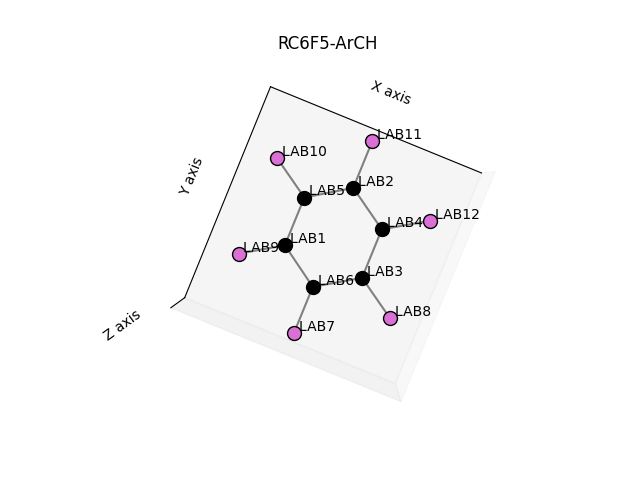

C1D C1D 0.0 1.52
C1D C2 2.3621832570738452 1.52
C1D C1E 2.34998479280186 1.52
C1D C1 2.7051260489670343 1.52
C1D C1A 1.33988 1.52
C1D C2D 1.3725051428683246 1.52
C1D F2D 2.324883752728295 1.333
C1D F1E 3.5687628959346682 1.333
C1D F1D 1.3371265679059705 1.333
C1D F1A 2.321282533816166 1.333
C1D F2 3.5463017654593356 1.333
C1D F1 4.041845339767469 1.333
C2 C2 0.0 1.52
C2 C1E 2.3621832570738452 1.52
C2 C1 1.3725051428683246 1.52
C2 C1A 1.3725051428683246 1.52
C2 C2D 2.75856 1.52
C2 F2D 4.05533 1.333
C2 F1E 3.5835060551086 1.333
C2 F1D 3.5835060551086 1.333
C2 F1A 2.329995435317417 1.333
C2 F2 1.29677 1.333
C2 F1 2.329995435317417 1.333
C1E C1E 0.0 1.52
C1E C1 1.33988 1.52
C1E C1A 2.7051260489670343 1.52
C1E C2D 1.3725051428683246 1.52
C1E F2D 2.324883752728295 1.333
C1E F1E 1.3371265679059705 1.333
C1E F1D 3.5687628959346682 1.333
C1E F1A 4.041845339767469 1.333
C1E F2 3.5463017654593356 1.333
C1E F1 2.321282533816166 1.333
C1 C1 0.0 1.52
C1 C1A 2.34998479280186 1.52
C1 C2D 2.36218325707

<IPython.core.display.Javascript object>


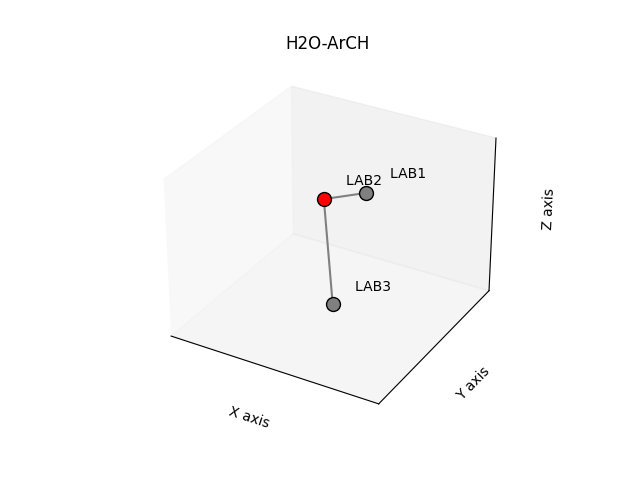

H27 H27 0.0 0.63
H27 O5 0.8606161862293781 0.9750000000000001
H27 H28 1.2901043627164426 0.63
O5 O5 0.0 1.32
O5 H28 0.8023688704704334 0.9750000000000001
H28 H28 0.0 0.63
(-0.2785416666666665, 0.30808833333333335) (-0.21409866666666677, 0.25586533333333306) (-0.7163731666666663, 0.6508498333333331)
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  ', 'LAB8  ', 'LAB9  ', 'LAB10 ', 'LAB11 ', 'LAB12 '] 
 ['C7', 'C8', 'C13', 'C12', 'C11', 'C10', 'C9', 'H10', 'H9', 'H8', 'H7', 'H6']


<IPython.core.display.Javascript object>


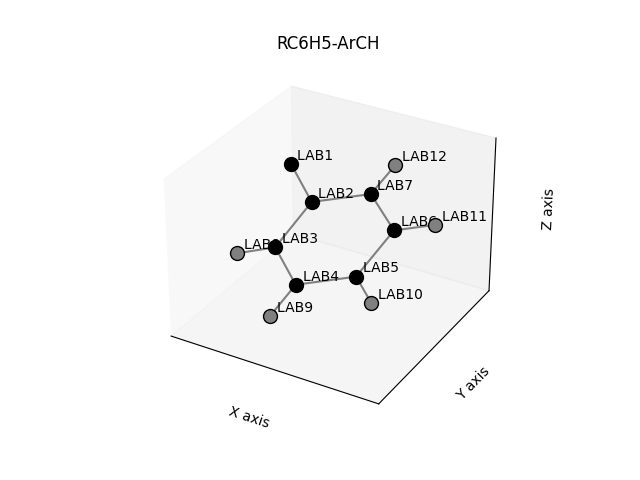

C7 C7 0.0 1.52
C7 C8 1.471117119266852 1.52
C7 C13 2.5221135794805125 1.52
C7 C12 3.790514058554592 1.52
C7 C11 4.283404347548806 1.52
C7 C10 3.771426726001713 1.52
C7 C9 2.4844231002790162 1.52
C7 H10 2.691679761412936 1.075
C7 H9 4.5348481386260335 1.075
C7 H8 5.213070896362336 1.075
C7 H7 4.505473402729175 1.075
C7 H6 2.629123425516573 1.075
C8 C8 0.0 1.52
C8 C13 1.4039510448730042 1.52
C8 C12 2.4278255761689302 1.52
C8 C11 2.8132502229627567 1.52
C8 C10 2.437551912431815 1.52
C8 C9 1.4091652206182208 1.52
C8 H10 2.0316266647688983 1.075
C8 H9 3.2640965232357937 1.075
C8 H8 3.7431343132326944 1.075
C8 H7 3.2743154561068186 1.075
C8 H6 2.035627487876895 1.075
C13 C13 0.0 1.52
C13 C12 1.389570026554977 1.52
C13 C11 2.41781254645599 1.52
C13 C10 2.787942194056397 1.52
C13 C9 2.4137953010559947 1.52
C13 H10 0.9299693985287901 1.075
C13 H9 2.019922906796197 1.075
C13 H8 3.2558033835138134 1.075
C13 H7 3.717921039357883 1.075
C13 H6 3.2549353437203634 1.075
C12 C12 0.0 1.52
C12 C11 1.3966

In [44]:
for central_group in central_groups:
    for contact_group in contact_groups:

        plot_fragment_with_labels(central_group, contact_group)

### Now plot the things as how the "user" has defined them
In reality, this is still a script, but it could be implemented in a GUI.

In [ ]:
definitions = pd.read_csv('../data/central_groups.csv')
display(definitions)

In [ ]:
def plot_fragment_with_user_labels(central_group, contact_group, definitions):
    row = definitions.loc[definitions.name == central_group]
    print(row)
    
    datafile = "..\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"
    csvfile =  "..\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.csv"

    fp = open(csvfile)
    labels = fp.readline().strip().split(',')
    atoms = fp.readline().strip().split(',')
    fp.close()

    to_delete = []
    for i in range(len(labels)):
        if not "LAB" in labels[i]:
            to_delete.append(i)

    for i in reversed(to_delete):
        del labels[i]
        del atoms[i]
        
    print(labels, '\n', atoms)

    fp = open(datafile)
    line = fp.readline()
    line = fp.readline()

    firstfragment = True
    dictionary = {}

    while firstfragment:                 
        information = line.split()
        x, y, z = float(information[1]), float(information[2]), float(information[3])
        dictionary[information[0]] = [x,y,z]

        line = fp.readline()
        
        if "**FRAG**" in line:
            firstfragment = False

    fp.close()

    fig = plt.figure()
    ax: Axes3D = fig.add_subplot(111, projection='3d')

    for i, atom in enumerate(atoms):
        x,y,z = dictionary[atom][0], dictionary[atom][1], dictionary[atom][2]
                
        if labels[i].strip() in row.bin.item().split('-'):
            ax.scatter(x,y,z, color='grey', marker='x')
        elif labels[i].strip() in row.R.item().split('-'):
            ax.scatter(x,y,z, color='lightgreen', marker='o')
        else:
            ax.scatter(x,y,z, color='blue')
            
        ax.text(x+0.01, y+0.01, z+0.01, labels[i])

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    plt.title(central_group + "-" + contact_group)
    plt.show()

In [ ]:
for central_group in central_groups:
    plot_fragment_with_user_labels(central_group, "CF", definitions)